#Atividade 1-ENGG69

Equipe:

*   Eduardo Fontes Baltazar da Silveira
*   André Castro da Rocha
*   João Pedro Lima Ribeiro


In [ ]:
#Importando bibliotecas
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
np.random.seed(42)

# Parte 1

Questão 1

In [ ]:
maior_area = 0
area_iteracao = {'area': [], 'iteracao': []}

def calcular_area(x):
    y = 80 - 2 * x
    return x * y

for i in range(41):
    x = i
    y = 80 - 2 * x
    area = calcular_area(x)
    if area > maior_area:
        maior_area = area
        max_x = x
        max_y = y

    area_iteracao['area'].append(area)
    area_iteracao['iteracao'].append(i)

# Exibindo os resultados
print(f"Maior área: {maior_area} obtida com x = {max_x} e y = {max_y}")

Maior área: 800 obtida com x = 20 e y = 40


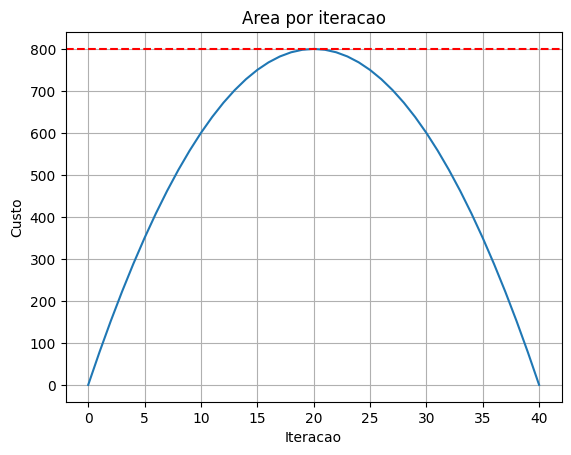

In [ ]:
plt.plot(area_iteracao['iteracao'], area_iteracao['area'])
plt.axhline(y=maior_area, color='r', linestyle='--')
plt.title('Area por iteracao')
plt.xlabel('Iteracao')
plt.ylabel('Custo')
plt.grid(True)
plt.show()

Questão 2

In [ ]:

def custo(r, h):
    volume_desejado = 375 * np.pi
    volume_atual = np.pi * r**2 * h

    custo_base = np.pi * r**2 * 0.15
    custo_lateral = 2 * np.pi * r * h * 0.05
    custo_material = custo_base + custo_lateral

    penalizacao_volume = (volume_desejado - volume_atual) ** 2

    return custo_material + penalizacao_volume

def vetor_gradiente(r, h):
    volume_desejado = 375 * np.pi
    volume_atual = np.pi * r**2 * h

    dr = (2 * np.pi * r * 0.15) + (2 * np.pi * h * 0.05) + (4 * (volume_desejado - volume_atual) * (-np.pi * r * h))
    dh = (2 * np.pi * r * 0.05) + (2 * (volume_desejado - volume_atual) * (-np.pi * r**2))

    max_grad = 1
    dr = np.clip(dr, -max_grad, max_grad)
    dh = np.clip(dh, -max_grad, max_grad)

    gradiente = {"dr": dr, "dh": dh}
    return gradiente

def atualizar(r, h, learning_rate=0.001, num_iteracoes=int(1e5), tol=1e-5):
    custo_epoch = {'custo': [], 'epoch': []}
    epocas_print = np.linspace(0, num_iteracoes, 12, dtype=int)
    for i in range(num_iteracoes):
        gradiente = vetor_gradiente(r, h)
        r = r - learning_rate * gradiente["dr"]
        h = h - learning_rate * gradiente["dh"]
        custo_atual = custo(r, h)
        custo_epoch['custo'].append(custo_atual)
        custo_epoch['epoch'].append(i)
        if i in epocas_print:
            print(f"Custo na iteração {i}: {custo_atual}")
        #caso convergir
        if custo_atual < tol and r > 0 and h > 0:
            break

    return r, h, custo_epoch

# Inicialização
import numpy as np
r_init, h_init = np.abs(np.random.randn(2))
r, h, custo_epoch = atualizar(r_init, h_init)

# Resultados
print(f"Raio ótimo: {r:.4f}, Altura ótima: {h:.4f}")
print(f"Custo ótimo: {custo(r, h):.4f}")
print(f'Diferenca de area: {(np.pi * r**2 * h) - (375 * np.pi)}')

Custo na iteração 0: 1387657.9045005452
Custo na iteração 9090: 41.436842537048804
Custo na iteração 18181: 41.49232167963906
Custo na iteração 27272: 41.436842537048804
Custo na iteração 36363: 41.49232167963906
Custo na iteração 45454: 41.436842537048804
Custo na iteração 54545: 41.49232167963906
Custo na iteração 63636: 41.436842537048804
Custo na iteração 72727: 41.49232167963906
Custo na iteração 81818: 41.436842537048804
Custo na iteração 90909: 41.49232167963906
Raio ótimo: 7.3327, Altura ótima: 6.9760
Custo ótimo: 41.4923
Diferenca de area: 0.2900781118669329


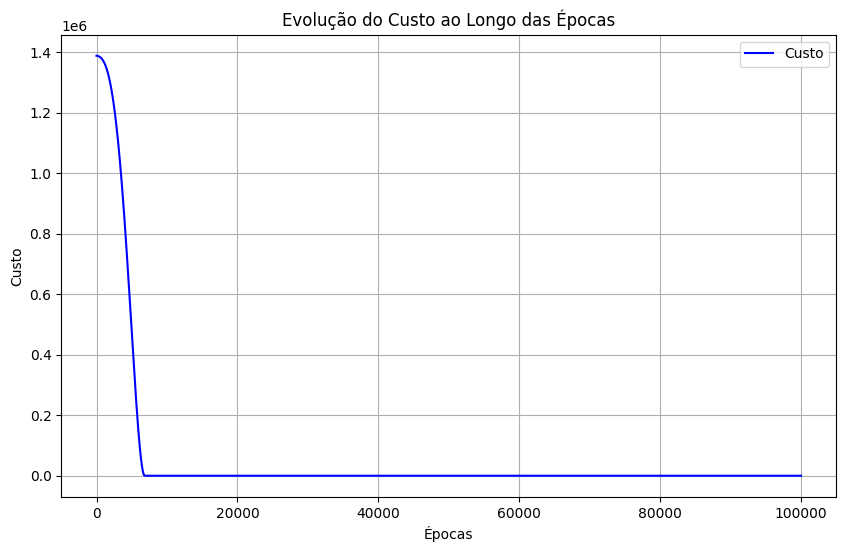

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(custo_epoch['epoch'], custo_epoch['custo'], label='Custo', color='blue')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.title('Evolução do Custo ao Longo das Épocas')
plt.legend()
plt.grid(True)
plt.show()

Questão 3

Problema 1: Método Simples

Problema 2: Método do gradiente

Questão 4

O código da questão 2 já está feito considerando o algoritmo do gradiente, então este código apenas se refere a questão 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def custo(x, y):
    return (2 * x + y - 80) ** 2

def vetor_gradiente(x, y):
    gradiente = {"dx": 8 * x + 4 * y - 320, "dy": 2 * y + 4 * x - 160}
    return gradiente


def atualizar(x, y, learning_rate=0.001, num_iteracoes=100000):
    custo_epoch = {'custo': [], 'epoch': []}
    variaveis = {'x': [], 'y': []}

    for i in range(num_iteracoes):
        gradiente = vetor_gradiente(x, y)

        x = x - learning_rate * gradiente["dx"]
        y = y - learning_rate * gradiente["dy"]

        custo_atual = custo(x, y)

        custo_epoch['custo'].append(custo_atual)
        custo_epoch['epoch'].append(i)

        variaveis['x'].append(x)
        variaveis['y'].append(y)

        if np.linalg.norm([gradiente["dx"], gradiente["dy"]]) < 1e-10 and (x, y) > (0, 0):
            break

    return custo_epoch, variaveis, x, y

#inicializacao das variaveis
x, y = np.abs(np.random.randn(2))

#aplicando metodo do gradiente
custo_epoch, variaveis, x_final, y_final = atualizar(x, y)

# resultados
print("Final dimensions (x, y):", x_final, y_final)
print("Final cost:", custo(x_final, y_final))

Final dimensions (x, y): 31.520325765048117 16.95934846988173
Final cost: 4.858072531099062e-22


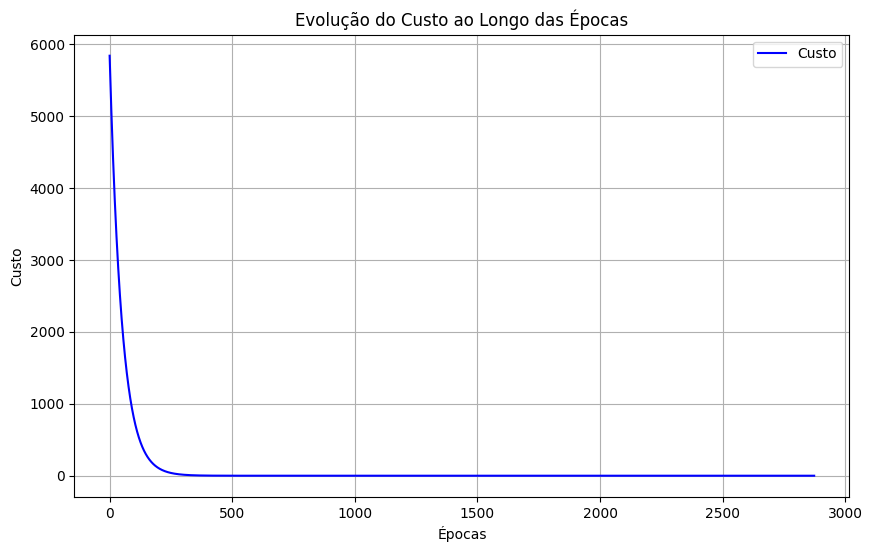

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(custo_epoch['epoch'], custo_epoch['custo'], label='Custo', color='blue')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.title('Evolução do Custo ao Longo das Épocas')
plt.legend()
plt.grid(True)
plt.show()

# Parte 2

1 Questão

a)

In [ ]:
#gerando dataset
media = 1000
desvio_padrao = 20
tamanho_amostras = 10000
amostras_X = np.random.normal(media, desvio_padrao, tamanho_amostras)

In [ ]:
 #Calcular a probabilidade de que XX seja menor que 1024.
prob_X_menor_1024 = (np.mean(amostras_X < 1024))
print(f"Probabilidade de X < 1024: {prob_X_menor_1024} %")

Probabilidade de X < 1024: 0.8854 %


In [ ]:
#Calcular a probabilidade teorica
from scipy.stats import norm
probabilidade_teorica = norm.cdf(1024, loc=media, scale=desvio_padrao)
print(f"Probabilidade teórica de X < 1024: {probabilidade_teorica} %")

Probabilidade teórica de X < 1024: 0.8849303297782918 %


In [ ]:
#Comparando probabilidades
diferenca_probabilidades = abs(prob_X_menor_1024 - probabilidade_teorica)
print(f"Diferença entre as probabilidades: {diferenca_probabilidades} %")

Diferença entre as probabilidades: 0.00046967022170818495 %


b)

In [ ]:
#Calcular P(X < 1024 | X > 961)
amostras_condicionais = amostras_X[amostras_X > 961]
prob_b = np.mean(amostras_condicionais < 1024)
print(f"Probabilidade de X < 1024 dado que X > 961: {prob_b} %")

Probabilidade de X < 1024 dado que X > 961: 0.8822804314329739 %


In [ ]:
#Calcular probabilidade teorica
teorica_b = (norm.cdf(1024, loc=media, scale=desvio_padrao) - norm.cdf(961, loc=media, scale=desvio_padrao)) / (1 - norm.cdf(961, loc=media, scale=desvio_padrao))
print(f"Probabilidade teórica de X < 1024 dado que X > 961: {teorica_b} %")

Probabilidade teórica de X < 1024 dado que X > 961: 0.8819086000062583 %


In [ ]:
#Calcular diferença
diferenca_probabilidades_b = abs(prob_b - teorica_b)
print(f"Diferença entre as probabilidades: {diferenca_probabilidades_b} %")

Diferença entre as probabilidades: 0.00037183142671559644 %


2 questão

a) e b)

In [ ]:
# Função para calcular valores teóricos de média e variância
def calcular_valores_teoricos(distribuicao, **kwargs):
    if distribuicao == 'uniforme':
        a = kwargs.get('a')
        b = kwargs.get('b')
        media_teorica = (a + b) / 2
        variancia_teorica = (b - a) ** 2 / 12

    elif distribuicao == 'normal':
        media = kwargs.get('media')
        desvio = kwargs.get('desvio')
        media_teorica = media
        variancia_teorica = desvio ** 2

    elif distribuicao == 'exponencial':
        lambda_ = kwargs.get('lambda_')
        media_teorica = 1 / lambda_
        variancia_teorica = 1 / (lambda_ ** 2)

    else:
        raise ValueError("Distribuição não suportada. Escolha entre 'uniforme', 'normal' ou 'exponencial'.")

    return {'media_teorica': media_teorica, 'variancia_teorica': variancia_teorica}

In [ ]:
def diferenca(variaveis_estatisticas,variaveis_teoricas):
  media_amostral = variaveis_estatisticas['media_amostral']
  media_teorica = variaveis_teoricas['media_teorica']
  variancia_amostral = variaveis_estatisticas['variancia_amostral']
  variancia_teorica = variaveis_teoricas['variancia_teorica']
  diferenca_media = abs(media_amostral - media_teorica)
  diferenca_variancia = abs(variancia_amostral - variancia_teorica)
  print(f'Diferença entre a média amostral e a média teórica: {diferenca_media}')
  print(f'Diferença entre a variância amostral e a variância teórica: {diferenca_variancia}')

In [ ]:
# Função para gerar variáveis aleatórias, exibir histogramas e boxplots
def gerar_variaveis_exibir(tamanho, dist, media, desvio):
    if dist == 'uniforme':
        # Geração de amostras para distribuição uniforme
        amostras = np.random.uniform(media - desvio, media + desvio, tamanho)
        variaveis_teoricas = calcular_valores_teoricos(dist, a=(media - desvio), b=(media + desvio))

    elif dist == 'normal':
        # Geração de amostras para distribuição normal
        amostras = np.random.normal(media, desvio, tamanho)
        variaveis_teoricas = calcular_valores_teoricos(dist, media=media, desvio=desvio)

    elif dist == 'exponencial':
        # Geração de amostras para distribuição exponencial
        lambda_ = 1 / media
        amostras = np.random.exponential(1 / lambda_, tamanho)
        variaveis_teoricas = calcular_valores_teoricos(dist, lambda_=lambda_)

    else:
        raise ValueError("Distribuição inválida. Escolha entre 'uniforme', 'normal' ou 'exponencial'.")

    # Histograma
    plt.hist(amostras, bins=30, alpha=0.5, color='blue')
    plt.title(f'Histograma - Distribuição {dist.capitalize()} com {tamanho} pontos')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.show()

    # Boxplot
    plt.boxplot(amostras, vert=False)
    plt.title(f'Boxplot - Distribuição {dist.capitalize()} com {tamanho} pontos')
    plt.show()

    # Estatísticas amostrais
    media_amostral = np.mean(amostras)
    variancia_amostral = np.var(amostras)

    print(f"{dist.capitalize()} com {tamanho} pontos: Média Amostral = {media_amostral}, Variância Amostral = {variancia_amostral}")
    print(f"Média Teórica = {variaveis_teoricas['media_teorica']}, Variância Teórica = {variaveis_teoricas['variancia_teorica']}\n")

    # Dicionários com resultados
    variaveis_estatisticas = {'media_amostral': media_amostral, 'variancia_amostral': variancia_amostral}
    # Calculo das diferencas
    diferenca(variaveis_estatisticas,variaveis_teoricas)


In [ ]:
#Gerando variaveis aleatorias
tamanho = 1000
desvio = np.random.randint(1, 10)
media = np.random.randint(1, 100)

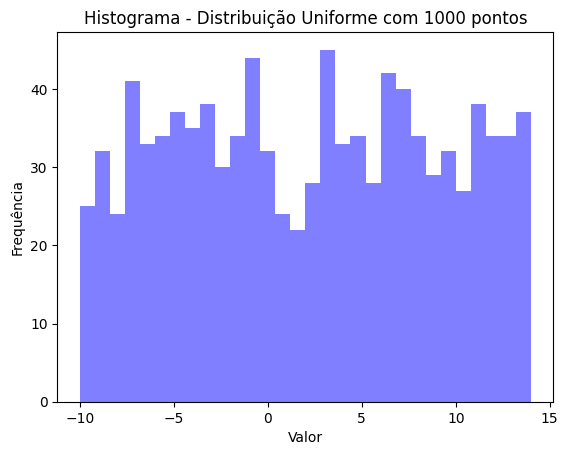

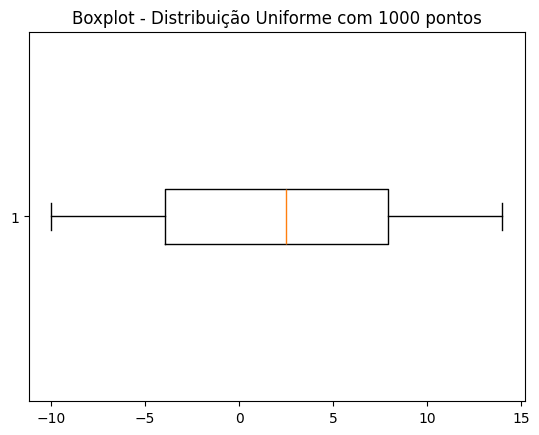

Uniforme com 1000 pontos: Média Amostral = 2.1523075348949834, Variância Amostral = 47.29157422443764
Média Teórica = 2.0, Variância Teórica = 48.0

Diferença entre a média amostral e a média teórica: 0.1523075348949834
Diferença entre a variância amostral e a variância teórica: 0.7084257755623611


In [ ]:
gerar_variaveis_exibir(tamanho, 'uniforme',desvio,media)

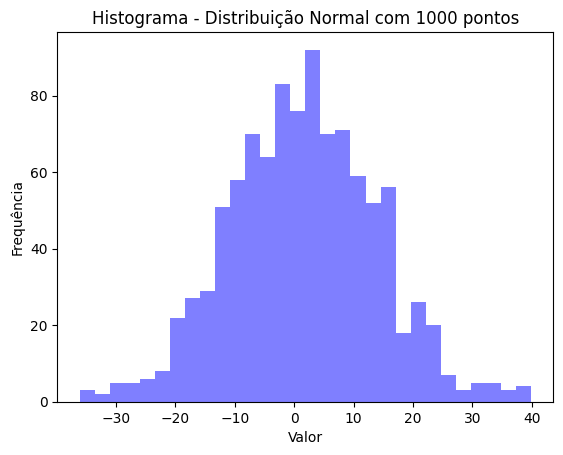

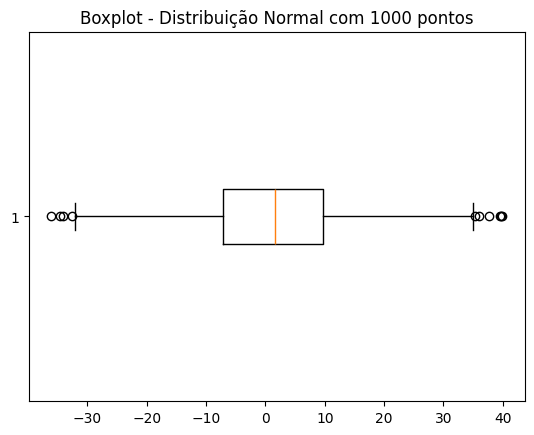

Normal com 1000 pontos: Média Amostral = 1.533762447321948, Variância Amostral = 152.53953819930592
Média Teórica = 2, Variância Teórica = 144

Diferença entre a média amostral e a média teórica: 0.466237552678052
Diferença entre a variância amostral e a variância teórica: 8.539538199305923


In [ ]:
gerar_variaveis_exibir(tamanho, 'normal',desvio,media)

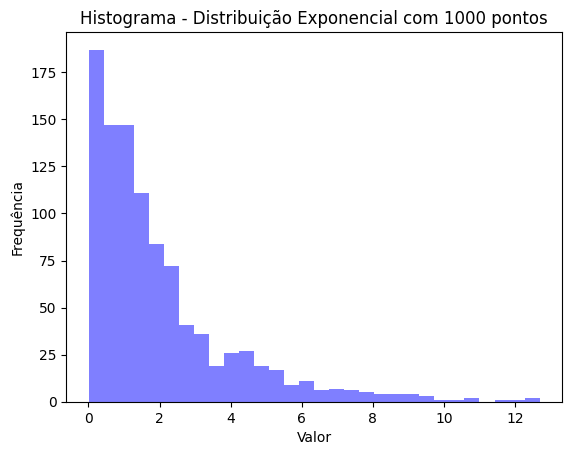

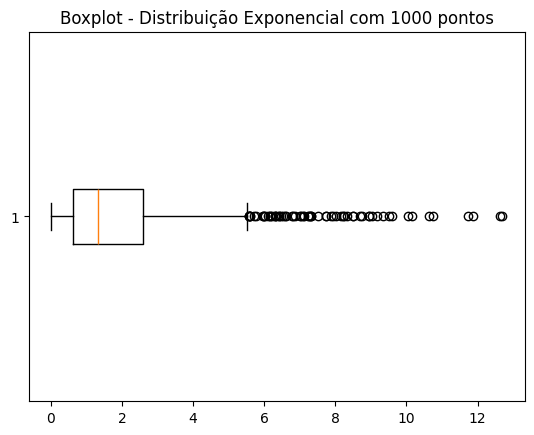

Exponencial com 1000 pontos: Média Amostral = 1.9963170875243275, Variância Amostral = 4.117783973638101
Média Teórica = 2.0, Variância Teórica = 4.0

Diferença entre a média amostral e a média teórica: 0.0036829124756725395
Diferença entre a variância amostral e a variância teórica: 0.117783973638101


In [ ]:
gerar_variaveis_exibir(tamanho, 'exponencial',desvio,media)

c)

In [ ]:
#Testando para 10000
tamanho = 10000

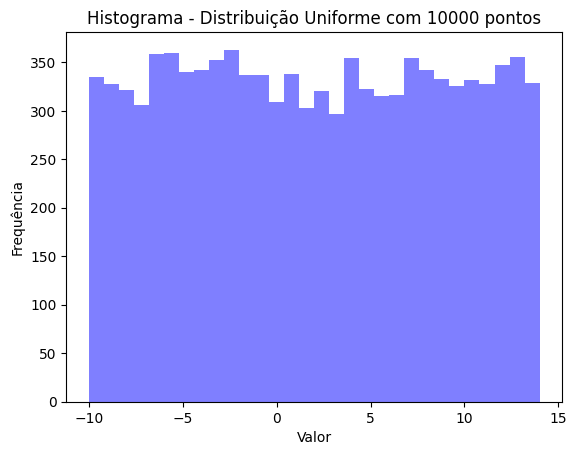

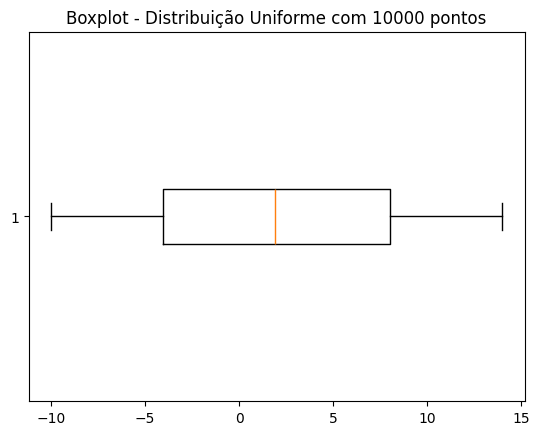

Uniforme com 10000 pontos: Média Amostral = 1.9861547862214382, Variância Amostral = 48.36684518146879
Média Teórica = 2.0, Variância Teórica = 48.0

Diferença entre a média amostral e a média teórica: 0.013845213778561849
Diferença entre a variância amostral e a variância teórica: 0.36684518146878986


In [ ]:
gerar_variaveis_exibir(tamanho, 'uniforme',desvio,media)

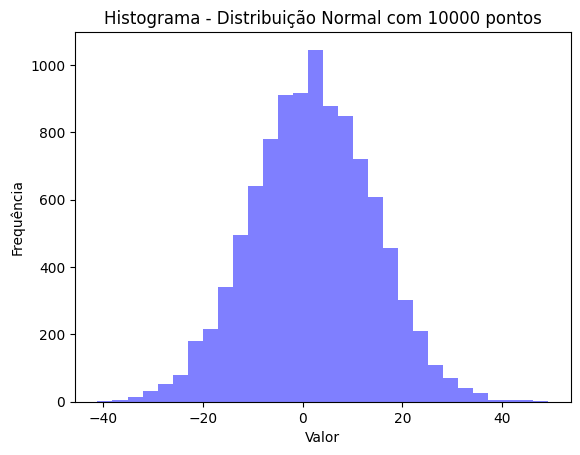

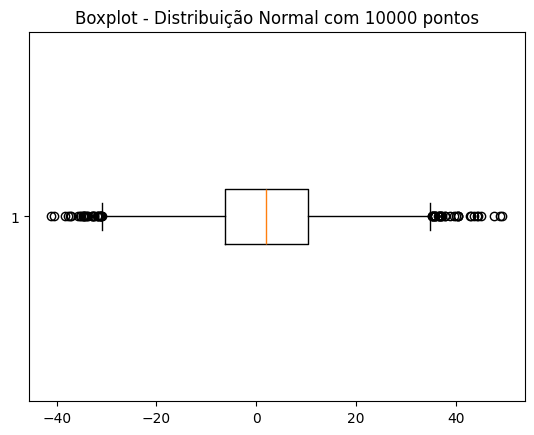

Normal com 10000 pontos: Média Amostral = 2.0233141890867956, Variância Amostral = 147.45859154825973
Média Teórica = 2, Variância Teórica = 144

Diferença entre a média amostral e a média teórica: 0.02331418908679561
Diferença entre a variância amostral e a variância teórica: 3.458591548259733


In [ ]:
gerar_variaveis_exibir(tamanho, 'normal',desvio,media)

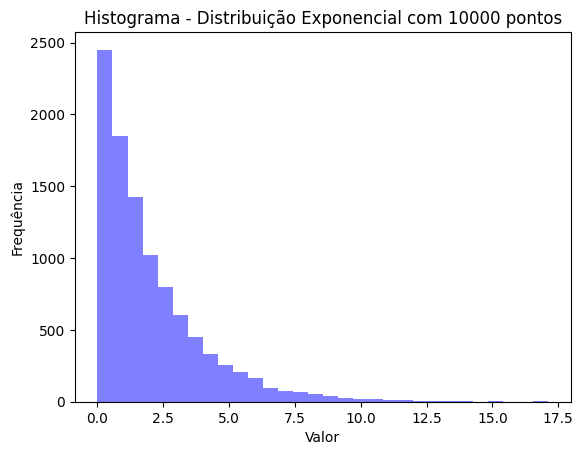

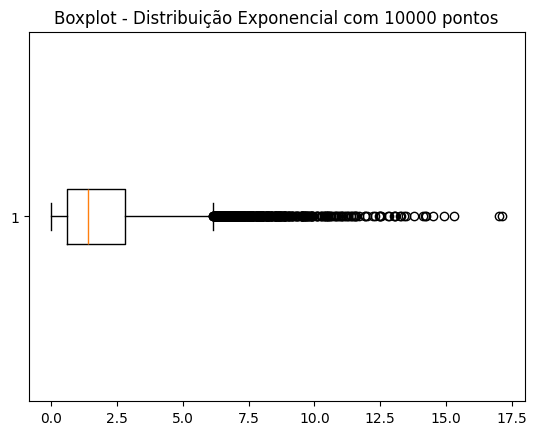

Exponencial com 10000 pontos: Média Amostral = 2.027436709804233, Variância Amostral = 4.077787727945154
Média Teórica = 2.0, Variância Teórica = 4.0

Diferença entre a média amostral e a média teórica: 0.02743670980423296
Diferença entre a variância amostral e a variância teórica: 0.07778772794515376


In [ ]:
gerar_variaveis_exibir(tamanho, 'exponencial',desvio,media)

In [ ]:
#testando para 10000
tamanho = 100000

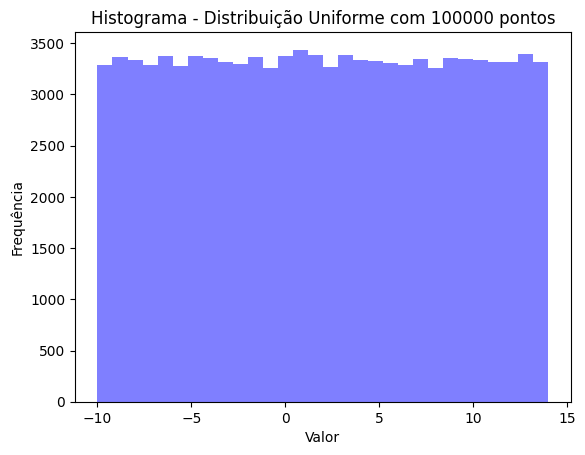

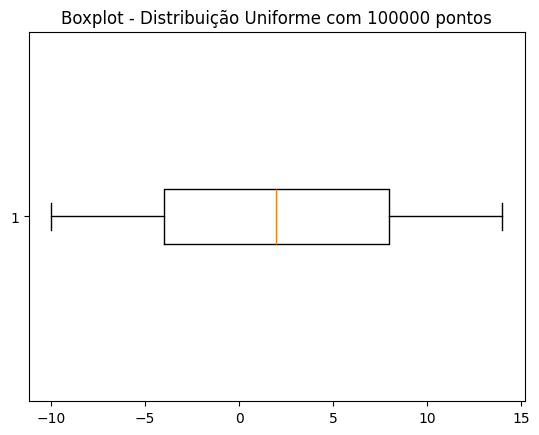

Uniforme com 100000 pontos: Média Amostral = 1.9998172381182373, Variância Amostral = 47.98091385371534
Média Teórica = 2.0, Variância Teórica = 48.0

Diferença entre a média amostral e a média teórica: 0.00018276188176269414
Diferença entre a variância amostral e a variância teórica: 0.01908614628465699


In [ ]:
gerar_variaveis_exibir(tamanho, 'uniforme',desvio,media)

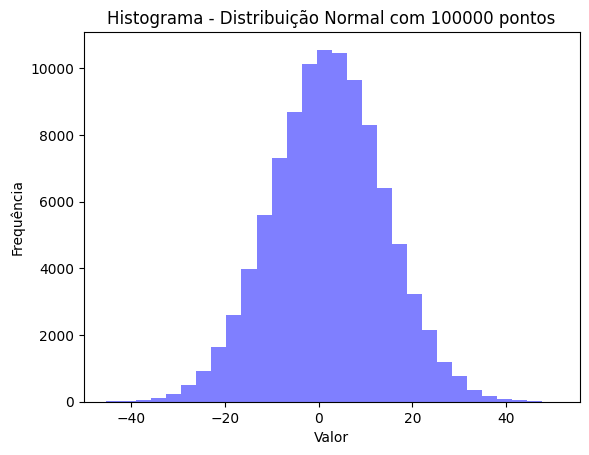

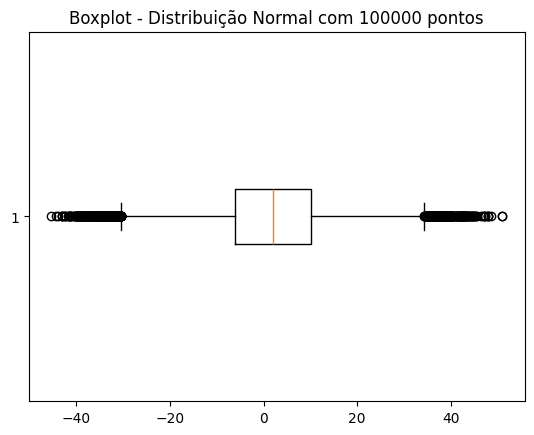

Normal com 100000 pontos: Média Amostral = 2.0269541873947605, Variância Amostral = 144.05066485195587
Média Teórica = 2, Variância Teórica = 144

Diferença entre a média amostral e a média teórica: 0.02695418739476052
Diferença entre a variância amostral e a variância teórica: 0.050664851955872336


In [ ]:
gerar_variaveis_exibir(tamanho, 'normal',desvio,media)

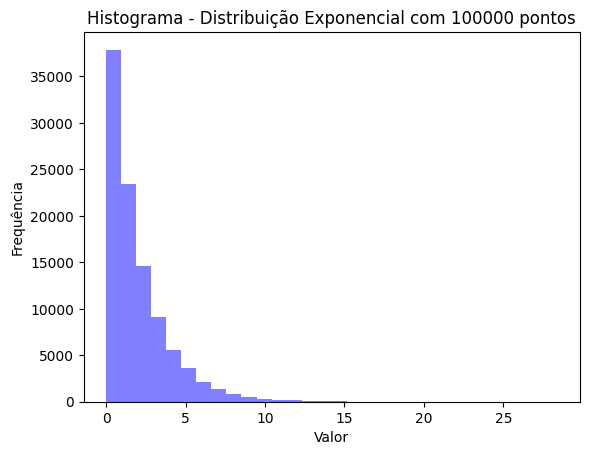

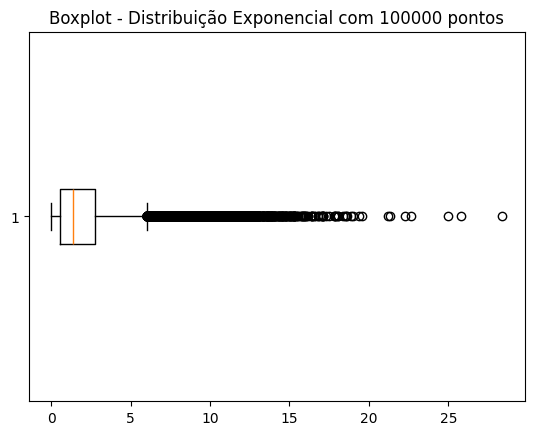

Exponencial com 100000 pontos: Média Amostral = 1.9927529706959217, Variância Amostral = 4.014910036259977
Média Teórica = 2.0, Variância Teórica = 4.0

Diferença entre a média amostral e a média teórica: 0.0072470293040782785
Diferença entre a variância amostral e a variância teórica: 0.014910036259976778


In [ ]:
gerar_variaveis_exibir(tamanho, 'exponencial',desvio,media)

d)



> Conforme aumentamos o tamanho do conjunto amostral (de 1.000 para 10.000 e, em seguida, para 100.000 pontos), os valores das médias e variâncias amostrais se aproximam cada vez mais dos valores teóricos esperados. Esse comportamento ocorre porque, com amostras maiores, reduzimos o impacto das flutuações aleatórias, permitindo uma melhor representação da distribuição de probabilidade real.


